# Unsupervised Learning

As we mentioned before, the NCAA tournament divides the 64 qualified teams into 16 different seed, according to their performance during the regular season. In reality, the selection of tournament teams as well as seeding has a high degree of subjectivity. Our goals are to quantify that subjectivity using unsupervised learning, specifically two different versions of the K Means Algorithm

## PCA

The first unsupervised technique used is principal component analysis (PCA). PCA was used before 

### Regular k-means

First, let's define as regular k-means, the algorithm available in the Python package scikit-learn. We decided to start with the data from year 2018. Initially, we sought to separate the teams into two separate clusters: one for qualified teams and the other for unqualified ones using the regular K-Means algorithm. We used all 14 principal components from our transformed statistics when computing the Euclidean distance in the algorithm, thus accounting for 100% of the variance. We obtained the following results (original data plotted as contrast) 

<img src="images/Regular_KMeans_AllTeams_2018.png"/>
<img src="images/AllTeams_PCA_2018.png"/>

Encouraged by the clear separation between the clusters, we decided to divide the qualified teams for the year 2018 by clustering the teams into 16 clusters (equivalent to 16 seeds) based on the all of the transformed statistics obtained with PCA. We obtained the following results

<img src="images/Regular_KMeans_2018_16Seeds.png"/>
<img src="images/Qualified_PCA_2018_16Seeds.png"/>
    
It seems like clustering was not very good. Specifically, the purity of the clustering hovers at **39.5%**. We hypothesized that decreasing the number of clusters to 4 (which corresponds into 1-4 seeds, 5-8 seeds, etc.) would yield better results

<img src="images/Regular_KMeans_2018_4Seeds.png"/>
<img src="images/Qualified_PCA_2018_4Seeds.png"/>
    
Here, purity was **56.1%**. Even though we achieved better results, we noticed another problem with the regular K-Means algorithm, specifically that number of points per cluster is not limited. For example, the number of datapoints in the last run were as follows:

| Cluster Number       | Number of Elements   |
|:-----------------------------:|:----:|
| 1                            | 10 |
| 2                            | 15   |
| 3                            | 17   |
| 4                            | 22   |

### Modified K-Means

Given these limitations, we created a Modified KMeans algorithm that evenly divides datapoints across clusters. Specifically, the clusters prioritize having the minimum distance between a datapoint and the cluster center, discarding the points that are farther away. These points in turn are forced to belong to another cluster. The implementation looked as follows for both the cases of 16 and 4 clusters

<img src="images/Modified_KMeans_2018_16Seeds.png"/>
<img src="images/Modified_KMeans_2018_4Seeds.png"/>
    
When we looked at the purity of each clustering, we obtained slightly better results when compared to the regular K-Means algorithm. Specifically, we obtained a purity of **41.7%** for 16 seeds (compared to 39.5%) and **57.5%** (compared to 56.1%)

We then decided to further test the performance of both clustering algorithms by using data for all available years in the dataset (2010-2018). We normalized the statistics to the corresponding season in order to minimize differences in performance across the years. Results of PCA are shown here for contrast against the clusters later on 

<img src="images/Qualified_PCA_All_16Seeds.png"/>
<img src="images/Qualified_PCA_All_4Seeds.png"/>
    
Furthermore, these are the results of running both algorithms for 16 clusters... 

<img src="images/Regular_KMeans_All_16Seeds.png"/>
<img src="images/Modified_KMeans_All_16Seeds.png"/>
    
...and 4 clusters

<img src="images/Regular_KMeans_All_4Seeds.png"/>
<img src="images/Modified_KMeans_All_4Seeds.png"/>
    
In terms of purity, we obtained the following measurements.

| Number of Clusters       | Regular   | Modified  |
|:-----------------------------:|:----:|:---:|
| 16                            | 26.5% | 26.1% |
| 4                            | 54.9%   |   55.0% |


It is important to recognize the limitations of the latter approach to unsupervised clustering. Given more data, it appears that both algorithms have the same performance. This spans from the prioritization of assignment of data points to a cluster. A careful observer would note that some points in the modified K-Means algorithm are far away from their cluster center. This points could be called "outliers", not being close enough to any cluster center and thus assigned by default to a the center that is closest to it that doesn't have all points assigned to it yet

### Conclusive Remarks about Unsupervised Learning

The results from both hierarchical clustering and K-Means seem to highlight the poor performance of unsupervised learning to predict the seeding positions for any given year. More complicated algorithms or more exhaustive data could yield to better results, but we expect those to only show marginal imporvements over the algorithms described here given the subjectivity of seeding assignment carried out by a group of judges

**Include a transition statement to Supervised Learning**
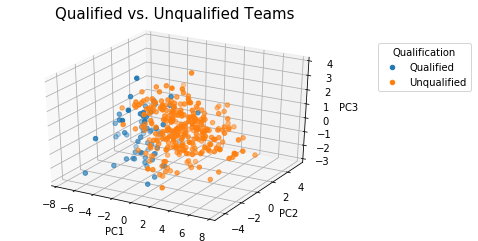
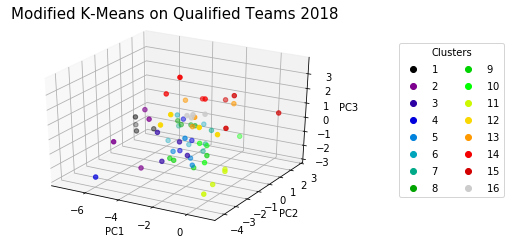
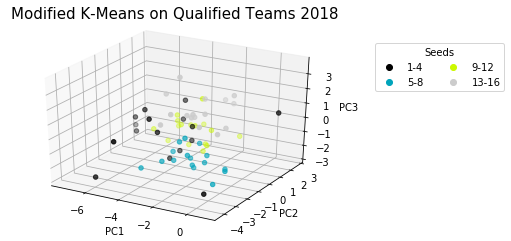
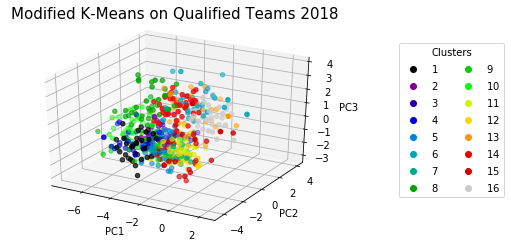
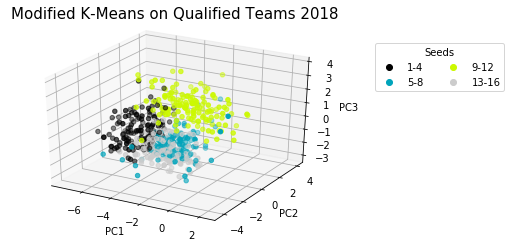
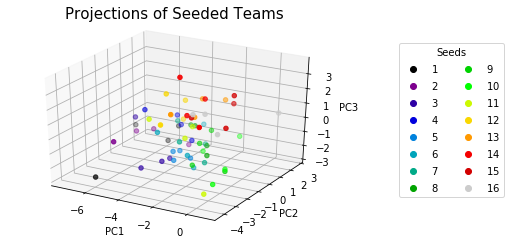
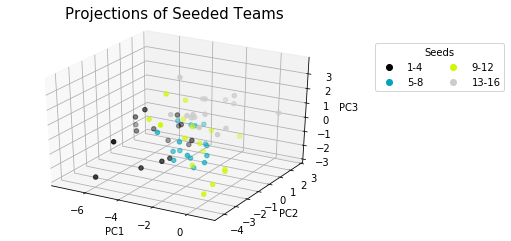
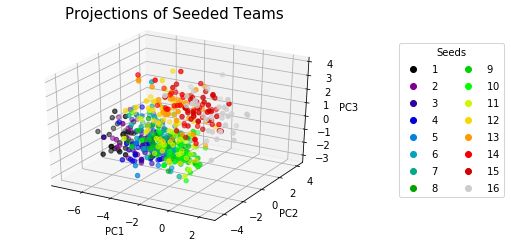
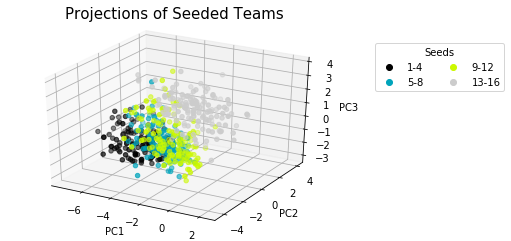
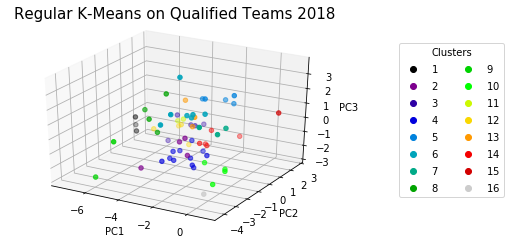
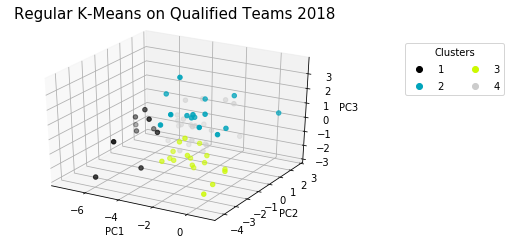
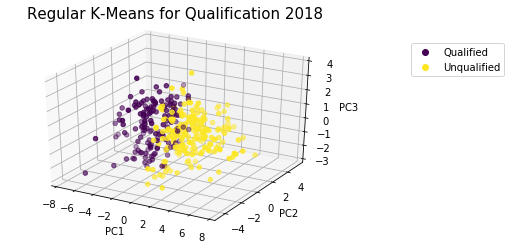
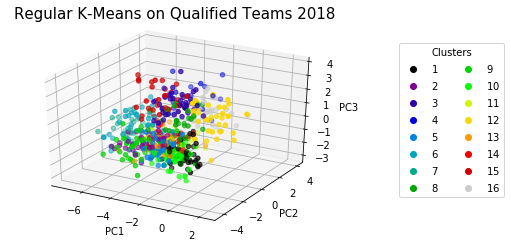
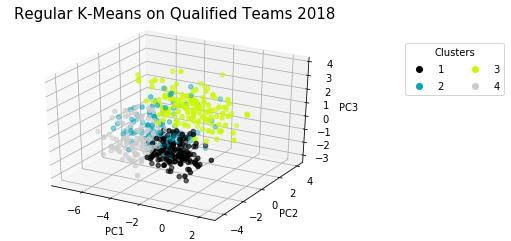